# Mount Google Drive

Only do this if you're using Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Necessary Library

In [ ]:
! pip install ultralytics
! pip install tensorflow
! pip install keras
! pip install kaggle
! pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# Importing Library

In [ ]:
from ultralytics import YOLO
import os
import pandas as pd
from tensorflow import keras
import zipfile
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Downloading and Extracting the Dataset in Zip File

## (Optional) Importing the Dataset from Kaggle

Importing the dataset from Kaggle because the dataset is too big for GitHub

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download imeldamaretta/flower-disease

Dataset URL: https://www.kaggle.com/datasets/imeldamaretta/flower-disease
License(s): CC0-1.0
100% 213M/214M [00:12<00:00, 18.4MB/s]
100% 214M/214M [00:12<00:00, 17.8MB/s]


# (Optional) Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow

In [ ]:
from google.colab import userdata
RF_TOKEN = userdata.get('RF_TOKEN')

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key=RF_TOKEN)
project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-4 in yolov8:: 100%|██████████| 7524/7524 [00:01<00:00, 5787.56it/s]


## Extracting the Zip File

If your dataset is not automatically extracted, run this code

In [ ]:
# Specify the path to your zip file
zip_file_path = '/content/flower-disease.zip'  # Replace with your zip file path

# Specify the directory where you want to extract the contents
extract_dir = '/content/drive/MyDrive/dataset/Flower_Disease_v2'  # Replace with your desired extraction directory

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

# Training the Model

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Train on custom dataset
model.train(data='/content/Flower-Disease-4/data.yaml', epochs=100, imgsz=640, batch=64, lr0 = 0.01)

100%|██████████| 6.25M/6.25M [00:00<00:00, 340MB/s]

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Flower-Disease-4/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False,

100%|██████████| 755k/755k [00:00<00:00, 116MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 290MB/s]


AMP: checks passed ✅


train: Scanning /content/Flower-Disease-4/train/labels... 3170 images, 6 backgrounds, 0 corrupt: 100%|██████████| 3170/3170 [00:01<00:00, 1851.51it/s]


train: New cache created: /content/Flower-Disease-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 644, len(boxes) = 13701. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Flower-Disease-4/valid/labels... 494 images, 0 backgrounds, 0 corrupt: 100%|██████████| 494/494 [00:00<00:00, 988.75it/s]

val: New cache created: /content/Flower-Disease-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.31G      1.345      3.051       1.59        277        640: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.83s/it]

                   all        494       2275      0.626      0.192      0.236      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.22G      1.256       1.94      1.526        262        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

                   all        494       2275      0.357      0.176      0.149     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.22G      1.227      1.615      1.471        253        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]


                   all        494       2275      0.449      0.119      0.106      0.062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.33G      1.201      1.487      1.439        293        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        494       2275      0.442      0.252      0.226      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.27G      1.168      1.387      1.408        298        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all        494       2275      0.419      0.267      0.167     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.23G      1.132      1.253      1.371        311        640: 100%|██████████| 50/50 [00:56<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]

                   all        494       2275      0.385      0.323      0.187      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.09G      1.113      1.191      1.354        310        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all        494       2275       0.47       0.28      0.263      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.35G      1.097      1.114      1.334        251        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]

                   all        494       2275      0.523      0.356      0.348      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.28G      1.069      1.078      1.317        295        640: 100%|██████████| 50/50 [00:57<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.28s/it]

                   all        494       2275       0.31      0.311      0.269      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       8.3G       1.06      1.043      1.311        280        640: 100%|██████████| 50/50 [01:03<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]

                   all        494       2275      0.488      0.395      0.314      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.33G      1.042     0.9958      1.297        214        640: 100%|██████████| 50/50 [00:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

                   all        494       2275       0.31      0.409      0.307      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.33G      1.047     0.9777      1.298        290        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]

                   all        494       2275       0.33      0.408      0.366      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.39G      1.034     0.9468       1.29        239        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

                   all        494       2275      0.311      0.327      0.317      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.39G       1.02     0.9265      1.283        239        640: 100%|██████████| 50/50 [00:53<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]

                   all        494       2275      0.396      0.319      0.362      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.64G      1.011      0.903      1.275        279        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]

                   all        494       2275      0.317      0.334      0.289      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.27G     0.9961     0.8805      1.262        272        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.31s/it]

                   all        494       2275      0.388      0.347      0.383      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.22G      1.001     0.8757      1.266        286        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

                   all        494       2275      0.278      0.349      0.289      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.65G     0.9849     0.8434      1.249        217        640: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

                   all        494       2275      0.394      0.352      0.383      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.75G     0.9755     0.8393      1.244        253        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]

                   all        494       2275      0.436      0.308      0.372      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       8.1G     0.9793     0.8286      1.251        281        640: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.14s/it]

                   all        494       2275       0.36      0.372      0.388      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.27G     0.9556     0.8071      1.233        240        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

                   all        494       2275      0.303      0.411      0.306      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.27G     0.9438     0.7829      1.227        278        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.09s/it]

                   all        494       2275      0.364      0.338      0.361      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.39G      0.943     0.7754       1.22        313        640: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        494       2275      0.376      0.339      0.368      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.19G     0.9362     0.7641      1.216        295        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]

                   all        494       2275      0.343      0.389      0.375      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       8.3G     0.9201     0.7484      1.215        217        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]

                   all        494       2275      0.381      0.368       0.38      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.28G      0.929     0.7485      1.215        225        640: 100%|██████████| 50/50 [00:53<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]

                   all        494       2275      0.379      0.353       0.38      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       8.3G     0.9213     0.7301       1.21        286        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]

                   all        494       2275      0.322      0.358      0.354      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.28G     0.9101     0.7161      1.198        280        640: 100%|██████████| 50/50 [00:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]

                   all        494       2275      0.315      0.313       0.28      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.35G     0.9213     0.7251      1.204        276        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

                   all        494       2275      0.305      0.308      0.305      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.25G     0.9108     0.7125      1.197        246        640: 100%|██████████| 50/50 [00:57<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]

                   all        494       2275      0.354      0.356      0.383      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       8.1G     0.9072     0.6945      1.198        253        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.99s/it]

                   all        494       2275      0.317      0.327      0.338      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.25G     0.9011     0.6849      1.188        291        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]

                   all        494       2275      0.314      0.344      0.331      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.27G     0.8855     0.6727       1.18        272        640: 100%|██████████| 50/50 [00:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.12s/it]

                   all        494       2275       0.37      0.342      0.361      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.27G     0.8835     0.6779       1.18        221        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        494       2275      0.355       0.37      0.371       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.35G     0.8777     0.6657      1.176        213        640: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all        494       2275      0.362      0.351      0.361      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.77G     0.8777      0.663       1.18        232        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        494       2275      0.354       0.38      0.384      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.28G     0.8695     0.6605      1.175        232        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]

                   all        494       2275      0.354      0.363      0.359      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.23G     0.8652     0.6501      1.176        221        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all        494       2275      0.347      0.372      0.368       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.69G     0.8527     0.6391      1.166        232        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]

                   all        494       2275      0.357      0.339      0.353      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.32G     0.8488     0.6324      1.162        292        640: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.06s/it]

                   all        494       2275      0.374      0.386      0.402      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.32G     0.8508     0.6236      1.159        237        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        494       2275      0.369      0.388      0.397      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       8.6G     0.8475     0.6266       1.16        290        640: 100%|██████████| 50/50 [00:58<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]

                   all        494       2275       0.34      0.366      0.349      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.35G     0.8321     0.6145      1.149        252        640: 100%|██████████| 50/50 [00:55<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]

                   all        494       2275      0.362      0.388      0.401      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.37G     0.8327     0.6052      1.147        249        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]

                   all        494       2275      0.321      0.381      0.356      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.25G     0.8284     0.6115      1.147        296        640: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]

                   all        494       2275      0.312      0.405      0.378      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.67G     0.8277     0.6032      1.144        257        640: 100%|██████████| 50/50 [00:55<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]

                   all        494       2275      0.259      0.351      0.298      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       8.3G     0.8221     0.5986      1.139        240        640: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

                   all        494       2275      0.292      0.355      0.337       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       9.2G     0.8136     0.5863      1.137        255        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]

                   all        494       2275      0.328      0.353      0.337      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.25G     0.8073     0.5835      1.135        276        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        494       2275      0.314      0.383      0.371      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.71G      0.808     0.5846      1.135        218        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.10s/it]

                   all        494       2275      0.319      0.389      0.357      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.32G     0.8208      0.581      1.138        315        640: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

                   all        494       2275      0.362      0.346      0.354      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.28G     0.8035     0.5816      1.133        234        640: 100%|██████████| 50/50 [00:55<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all        494       2275      0.322      0.371      0.344      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.39G     0.7921     0.5687      1.126        264        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.22s/it]

                   all        494       2275      0.336      0.368      0.349      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.23G     0.7929     0.5612      1.124        262        640: 100%|██████████| 50/50 [00:54<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        494       2275      0.337      0.392      0.379      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.39G       0.79     0.5641       1.12        271        640: 100%|██████████| 50/50 [00:57<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]

                   all        494       2275      0.337      0.376      0.352      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.72G     0.7836     0.5589      1.119        296        640: 100%|██████████| 50/50 [00:59<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]

                   all        494       2275      0.387      0.363      0.377       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.27G     0.7764     0.5588      1.119        212        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]

                   all        494       2275      0.351      0.376       0.36      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.23G     0.7696     0.5428      1.112        281        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]

                   all        494       2275       0.37       0.37      0.377      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.65G     0.7668     0.5421      1.108        259        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]

                   all        494       2275      0.362      0.375      0.396      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.33G     0.7567     0.5411      1.104        287        640: 100%|██████████| 50/50 [00:57<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]

                   all        494       2275      0.359      0.368       0.38      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.27G     0.7614     0.5396      1.105        289        640: 100%|██████████| 50/50 [00:55<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.11s/it]

                   all        494       2275       0.35      0.346      0.359       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.69G      0.763     0.5336      1.105        218        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.13s/it]

                   all        494       2275      0.398      0.378      0.402      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.33G     0.7595     0.5294      1.099        323        640: 100%|██████████| 50/50 [00:53<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all        494       2275      0.346      0.366      0.362       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.19G      0.747     0.5277      1.102        355        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]

                   all        494       2275      0.346      0.374      0.363      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.22G     0.7389     0.5207      1.098        249        640: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]

                   all        494       2275      0.367      0.373      0.388      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.25G     0.7492     0.5236      1.101        325        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]

                   all        494       2275      0.359      0.399      0.403      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.33G     0.7418     0.5148      1.096        259        640: 100%|██████████| 50/50 [00:59<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        494       2275      0.362      0.375      0.384      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.25G     0.7374     0.5126      1.093        313        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]

                   all        494       2275      0.356       0.36      0.361       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       8.3G     0.7364     0.5182      1.098        243        640: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

                   all        494       2275      0.376       0.38      0.397      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       8.3G     0.7306     0.5057      1.092        253        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.08s/it]

                   all        494       2275      0.381      0.385      0.398      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.37G     0.7296     0.5006      1.092        283        640: 100%|██████████| 50/50 [00:56<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]

                   all        494       2275      0.346      0.399      0.379      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.32G     0.7171     0.4921      1.082        269        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all        494       2275      0.372      0.391      0.393      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.19G     0.7194     0.4926      1.086        247        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        494       2275      0.386      0.364      0.382      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.37G     0.7171     0.4889      1.084        229        640: 100%|██████████| 50/50 [00:57<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]

                   all        494       2275      0.379       0.36      0.385      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.23G     0.7206     0.4908      1.086        234        640: 100%|██████████| 50/50 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        494       2275      0.321      0.405      0.369      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.37G     0.7118     0.4863      1.078        232        640: 100%|██████████| 50/50 [00:56<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all        494       2275       0.38      0.376      0.392      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.27G     0.7071     0.4817      1.078        315        640: 100%|██████████| 50/50 [00:54<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]

                   all        494       2275      0.353      0.419      0.379      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.23G     0.7128     0.4829       1.08        315        640: 100%|██████████| 50/50 [00:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]

                   all        494       2275      0.351      0.413       0.39      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.25G     0.7068     0.4824      1.075        299        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]

                   all        494       2275      0.361      0.425      0.398      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.28G     0.6987     0.4779      1.071        303        640: 100%|██████████| 50/50 [00:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.23s/it]

                   all        494       2275      0.356       0.41      0.407      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.22G     0.6891       0.47      1.067        305        640: 100%|██████████| 50/50 [00:54<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

                   all        494       2275      0.325      0.401      0.378      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       8.3G     0.6926     0.4697      1.071        295        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.25s/it]

                   all        494       2275      0.351      0.381      0.378      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       8.4G     0.6974     0.4693       1.07        235        640: 100%|██████████| 50/50 [00:55<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        494       2275      0.351      0.409      0.402      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.35G     0.6885     0.4701      1.069        294        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.17s/it]

                   all        494       2275      0.353      0.375      0.373      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.32G     0.6836     0.4631      1.065        291        640: 100%|██████████| 50/50 [00:56<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]

                   all        494       2275      0.385       0.37      0.389      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.74G     0.6765     0.4557      1.063        246        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all        494       2275      0.364      0.383      0.385      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.28G      0.675     0.4562       1.06        295        640: 100%|██████████| 50/50 [00:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]

                   all        494       2275      0.355      0.399      0.389      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.25G     0.6749     0.4544      1.057        301        640: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.08s/it]

                   all        494       2275      0.358       0.39      0.383      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.81G     0.6656     0.4514      1.054        257        640: 100%|██████████| 50/50 [00:57<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]

                   all        494       2275      0.369      0.355      0.366      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.35G     0.6723     0.4488      1.057        287        640: 100%|██████████| 50/50 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.22s/it]

                   all        494       2275      0.352      0.375      0.376      0.264


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.19G     0.6339     0.3655      1.025        134        640: 100%|██████████| 50/50 [00:59<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        494       2275      0.397      0.372      0.384      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.16G     0.6043      0.338      1.009        166        640: 100%|██████████| 50/50 [00:52<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]

                   all        494       2275      0.363      0.376      0.383      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.17G     0.5898     0.3262      0.999        147        640: 100%|██████████| 50/50 [00:51<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.36s/it]

                   all        494       2275       0.37      0.358      0.372      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.19G     0.5837     0.3215     0.9976        162        640: 100%|██████████| 50/50 [00:53<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]

                   all        494       2275      0.359       0.37      0.374      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.16G     0.5809     0.3163     0.9941        156        640: 100%|██████████| 50/50 [00:53<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        494       2275      0.382      0.359      0.376      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.19G     0.5745     0.3132      0.992        129        640: 100%|██████████| 50/50 [00:52<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.23s/it]

                   all        494       2275      0.344      0.388       0.38      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.19G     0.5717      0.311     0.9893        145        640: 100%|██████████| 50/50 [00:50<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]

                   all        494       2275       0.38      0.364      0.382       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.19G     0.5635     0.3093     0.9857        142        640: 100%|██████████| 50/50 [00:56<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

                   all        494       2275      0.371      0.376      0.381      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.19G     0.5629     0.3074     0.9866        124        640: 100%|██████████| 50/50 [00:52<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all        494       2275      0.376      0.374      0.383       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.19G      0.566     0.3074     0.9848        150        640: 100%|██████████| 50/50 [00:54<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all        494       2275      0.374      0.374      0.384       0.27



100 epochs completed in 1.770 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.65s/it]


                   all        494       2275      0.355      0.409      0.407      0.287
            black-spot        200        532       0.64      0.867      0.799       0.56
          downy-mildew         78        335      0.521      0.418      0.497      0.334
               healthy        334        980      0.615      0.761      0.739      0.539
               jasmine         29        422          0          0          0          0
                orchid          6          6          0          0    0.00208   0.000358
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7929102ab610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# Evaluating the Model

In [ ]:
# Evaluate the model
metrics = model.val(data='/content/Flower-Disease-4/data.yaml')

# Print the evaluation metrics
print(metrics)

# Access specific metrics
print(f"mAP@0.5: {metrics.box.map50}")
print(f"mAP@0.5:0.95: {metrics.box.map}")
# ... other metrics

# Visualize the results using the plot method
results = model.val(data='/content/Flower-Disease-4/data.yaml',plots=True)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Flower-Disease-4/valid/labels.cache... 494 images, 0 backgrounds, 0 corrupt: 100%|██████████| 494/494 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.21s/it]


                   all        494       2275      0.355       0.41      0.408      0.287
            black-spot        200        532      0.637      0.867      0.798       0.56
          downy-mildew         78        335      0.523      0.423      0.499      0.335
               healthy        334        980      0.615      0.761      0.739      0.538
               jasmine         29        422          0          0          0          0
                orchid          6          6          0          0    0.00207   0.000357
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79279d6e64d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_resul

val: Scanning /content/Flower-Disease-4/valid/labels.cache... 494 images, 0 backgrounds, 0 corrupt: 100%|██████████| 494/494 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


                   all        494       2275      0.355       0.41      0.408      0.287
            black-spot        200        532      0.637      0.867      0.798       0.56
          downy-mildew         78        335      0.523      0.423      0.499      0.335
               healthy        334        980      0.615      0.761      0.739      0.538
               jasmine         29        422          0          0          0          0
                orchid          6          6          0          0    0.00207   0.000357
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train3


# Testing the Model


image 1/1 /content/Flower-Disease-4/test/images/20210603_073429_jpg.rf.6c4fd7da47c40c085bcc2339c2de5424.jpg: 640x640 4 fungal-diseases, 1 healthy, 18.5ms
Speed: 2.1ms preprocess, 18.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 3., 3., 3., 4.], device='cuda:0')
conf: tensor([0.9317, 0.9031, 0.8880, 0.8777, 0.3063], device='cuda:0')
data: tensor([[3.5362e+02, 2.0776e+02, 6.3955e+02, 4.1532e+02, 9.3166e-01, 3.0000e+00],
        [0.0000e+00, 2.4500e+02, 3.1004e+02, 3.9104e+02, 9.0308e-01, 3.0000e+00],
        [6.8696e+00, 3.3939e+02, 3.6714e+02, 5.4366e+02, 8.8805e-01, 3.0000e+00],
        [2.6211e+02, 3.8830e+02, 5.0556e+02, 5.4559e+02, 8.7773e-01, 3.0000e+00],
        [5.1738e+02, 5.2954e+02, 6.3984e+02, 6.3997e+02, 3.0627e-01, 4.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([5, 6])
xywh: tensor([[496.584

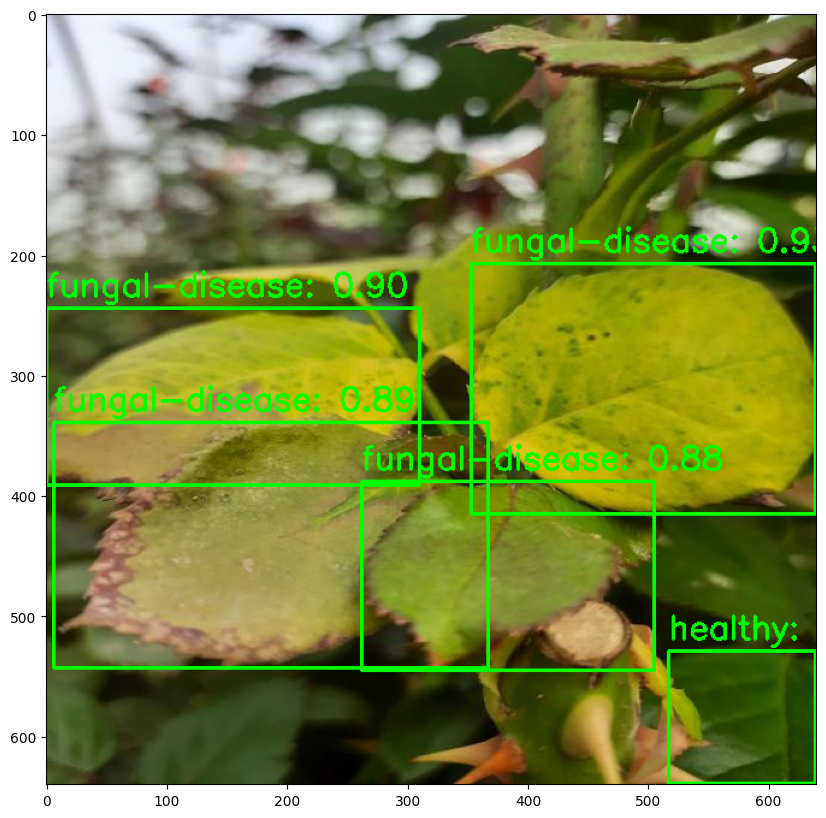

In [ ]:
# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/content/runs/detect/train/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/content/Flower-Disease-4/test/images/20210603_073429_jpg.rf.6c4fd7da47c40c085bcc2339c2de5424.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Display the image with bounding boxes

img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Saving the Model for Deployment